<a href="https://colab.research.google.com/github/JulienJ-44/rakuteam/blob/main/11_bis_Vote_3_mod%C3%A8les_ypred_proba_text_0_82_img_0_55.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Connection au google drive 
from google.colab import drive
drive.mount('/Drive')
pathSaveCsv = '/Drive/My Drive'

Drive already mounted at /Drive; to attempt to forcibly remount, call drive.mount("/Drive", force_remount=True).


In [37]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import requests
import io

In [52]:
model_index = 1#input("Select a model: 1-RF, 2-CNN image, 3-DNN texte, default-weighted voting")
print(model_index)

1


In [98]:
def load_df_code_designation():
  url = "https://raw.githubusercontent.com/JulienJ-44/rakuteam/main/Demo/df_classes_avec_code_libelle_code026.csv"
  download = requests.get(url).content
  df = pd.read_csv(io.StringIO(download.decode('utf-8')), index_col=0)
  return df

df_code_designation = load_df_code_designation()

In [41]:

def display_keywords(name_classe_reelle, name_classe_predite):
  dataf_code_designation=load_df_code_designation
  classe_predite_code026=dataf_code_designation[dataf_code_designation["désignation"]==name_classe_reelle].code_0a26
  classe_reelle_code026=(dataf_code_designation[dataf_code_designation["désignation"]==name_classe_predite]).code_0a26
  classe_predite_code=dataf_code_designation[dataf_code_designation["désignation"]==name_classe_reelle].prdtypecode
  classe_reelle_code=(dataf_code_designation[dataf_code_designation["désignation"]==name_classe_predite]).prdtypecode

  import pickle

  # reading the dictionnary des 15 keyword
  with open(f'{pathSaveCsv}/dico_keywords_tfidf_15.pkl', 'rb') as handle: 
    data = handle.read() 
  # reconstructing the data as dictionary 
  lst_keywords_byclass = pickle.loads(data) 

  print("Classe:",classe_reelle_code, " ", classe_reelle_code026)
  print(lst_keywords_byclass[int(classe_reelle_code)])
  print("Classe:",classe_predite_code, " ", classe_predite_code026)
  print(lst_keywords_byclass[int(classe_predite_code)])
  #df_comparekeywords[classe_reelle_code]=lst_keywords_byclass[int(classe_reelle_code)]
  df_comparekeywords=pd.DataFrame(index=np.arange(15))
  df_comparekeywords[classe_reelle_code]=[key for key in lst_keywords_byclass[int(classe_reelle_code)]]
  df_comparekeywords[classe_reelle_code+"_"]=[lst_keywords_byclass[key] for key in lst_keywords_byclass[int(classe_reelle_code)]]
  df_comparekeywords[classe_predite_code]=[key for key in lst_keywords_byclass[int(classe_predite_code)]]
  df_comparekeywords[classe_predite_code+"_"]=[lst_keywords_byclass[key] for key in lst_keywords_byclass[int(classe_predite_code)]]
  print(df_comparekeywords.head(15))


In [87]:
def get_ytest():
  url = "https://raw.githubusercontent.com/JulienJ-44/rakuteam/main/y_pred_proba/y_test.csv"# Make sure the url is the raw version of the file on GitHub
  download = requests.get(url).content
  y_test = pd.read_csv(io.StringIO(download.decode('utf-8')))
  # Remplacer les labels de 0 à 26
  y_test = y_test.replace({'prdtypecode': {10: 1, 2280:2,   50:3, 1280:4, 2705:5, 2522:6, 2582:7, 1560:8, 1281:9, 1920:10, 2403:11,
        1140:12, 2583:13, 1180:14, 1300:15, 2462:16, 1160:17, 2060:18,   40:19,   60:20, 1320:21, 1302:22,
        2220:23, 2905:24, 2585:25, 1940:26, 1301:0}})
  try:
    y_test = y_test.drop('Unnamed: 0', axis =1)
  except:
    print("(2)no columns Unnamed: 0")
  return y_test

def get_ytrain():
  url = "https://raw.githubusercontent.com/JulienJ-44/rakuteam/main/y_pred_proba/y_train.csv"# Make sure the url is the raw version of the file on GitHub
  download = requests.get(url).content
  y_train = pd.read_csv(io.StringIO(download.decode('utf-8')))
  # Remplacer les labels de 0 à 26
  return y_train

In [66]:
def set_model_name(model_index):
  if (model_index == "1"):
    model_selected="Random Forest"
    
  elif (model_index == "2"):
    model_selected="CNN images"
    
  elif (model_index == "3"):
    model_selected="DNN texte"
    
  else:
    model_selected="weighted voting"
  return model_selected

In [103]:
def calc_y_pred(model_index):
  if (model_index == "1"):
    url = "https://raw.githubusercontent.com/JulienJ-44/rakuteam/main/y_pred_proba/ypred_proba_RandomForest_Global_score0_74.csv"
    download = requests.get(url).content
    y_pred_proba= pd.read_csv(io.StringIO(download.decode('utf-8')))
  elif (model_index == "2"):
    url = "https://raw.githubusercontent.com/JulienJ-44/rakuteam/main/y_pred_proba/ypred_proba_Image_score_0_55_correct.csv"
    download = requests.get(url).content
    y_pred_proba= pd.read_csv(io.StringIO(download.decode('utf-8')))
  elif (model_index == "3"):
    url = "https://raw.githubusercontent.com/JulienJ-44/rakuteam/main/y_pred_proba/ypred_proba_DnnText_score0_82.csv"
    download = requests.get(url).content
    y_pred_proba= pd.read_csv(io.StringIO(download.decode('utf-8')))
  else:
    url = "https://raw.githubusercontent.com/JulienJ-44/rakuteam/main/y_pred_proba/ypred_proba_RandomForest_Global_score0_74.csv" # Make sure the url is the raw version of the file on GitHub
    download = requests.get(url).content
    y_pred_proba_rf = pd.read_csv(io.StringIO(download.decode('utf-8')))
    url = "https://raw.githubusercontent.com/JulienJ-44/rakuteam/main/y_pred_proba/ypred_proba_DnnText_score0_82.csv" # Make sure the url is the raw version of the file on GitHub
    download = requests.get(url).content
    y_pred_proba_dnntext = pd.read_csv(io.StringIO(download.decode('utf-8')))
    url = "https://raw.githubusercontent.com/JulienJ-44/rakuteam/main/y_pred_proba/ypred_proba_Image_score_0_55_correct.csv"# Make sure the url is the raw version of the file on GitHub
    download = requests.get(url).content
    y_pred_proba_img = pd.read_csv(io.StringIO(download.decode('utf-8')))
    score1_rf = 0.74
    score2_dnntext = 0.82
    score3_img = 0.58
    y_pred_proba = (score1_rf * y_pred_proba_rf + score2_dnntext * y_pred_proba_dnntext + score3_img * y_pred_proba_img) / (score1_rf + score2_dnntext + score3_img)
  # Drop les colonnes inutiles
  try:
      y_pred_proba = y_pred_proba.drop('Unnamed: 0', axis =1)
  except:
    print("(1)no columns Unnamed: 0")
  return y_pred_proba

In [108]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

def get_classif_report(index_model):
  model_index=index_model
  y_test=get_ytest()
  y_train=get_ytrain()
  model_selected=set_model_name(index_model)
  y_pred_proba=calc_y_pred(index_model)
  #preparation des données pour le crosstab
  # Convertir Dataframe en array
  y_pred_proba_arr = y_pred_proba.to_numpy()
  y_test = y_test.to_numpy()
  # on prend l'index de la proba la + élevée
  # pour récupérer les classes
  y_pred = y_pred_proba_arr.argmax(axis=1)
  y_pred
  # Pour ajouter une dimension en plus
  y_pred = np.reshape(y_pred, (-1, 1))
  return(metrics.classification_report(y_test, y_pred))
print("Evaluation détaillée de la Classification :\n \n" , get_classif_report("3"))

Evaluation détaillée de la Classification :
 
               precision    recall  f1-score   support

           0       0.96      0.87      0.91       154
           1       0.45      0.62      0.52       601
           2       0.85      0.87      0.86       964
           3       0.83      0.84      0.83       341
           4       0.70      0.70      0.70       944
           5       0.67      0.68      0.68       536
           6       0.94      0.91      0.93       993
           7       0.77      0.68      0.72       524
           8       0.83      0.82      0.82       967
           9       0.55      0.55      0.55       415
          10       0.90      0.91      0.91       866
          11       0.81      0.73      0.77       979
          12       0.76      0.72      0.74       552
          13       0.97      0.97      0.97      2045
          14       0.58      0.63      0.60       139
          15       0.94      0.95      0.94      1006
          16       0.79      0.80 

In [ ]:
# y_test = y_test.replace({'prdtypecode': {10: 1, 2280:2,   50:3, 1280:4, 2705:5, 2522:6, 2582:7, 1560:8, 1281:9, 1920:10, 2403:11,
#        1140:12, 2583:13, 1180:14, 1300:15, 2462:16, 1160:17, 2060:18,   40:19,   60:20, 1320:21, 1302:22,
#        2220:23, 2905:24, 2585:25, 1940:26, 1301:0}})

In [ ]:
# Crosstab avec ravel pr enlever dimension et eviter message d'erreur (Error: If using all scalar values, you must pass an index)
dfcross = pd.crosstab(y_test.ravel(), y_pred.ravel(), rownames=['Classe réelle'], colnames=['Classe prédite'],normalize = 0) #TODO remettre ,normalize = 0
dfcross = dfcross.sort_index(axis=0)
dfcross = dfcross.sort_index(axis=1)
dfcross.columns = df_code_designation['désignation']
dfcross.index = df_code_designation['désignation']

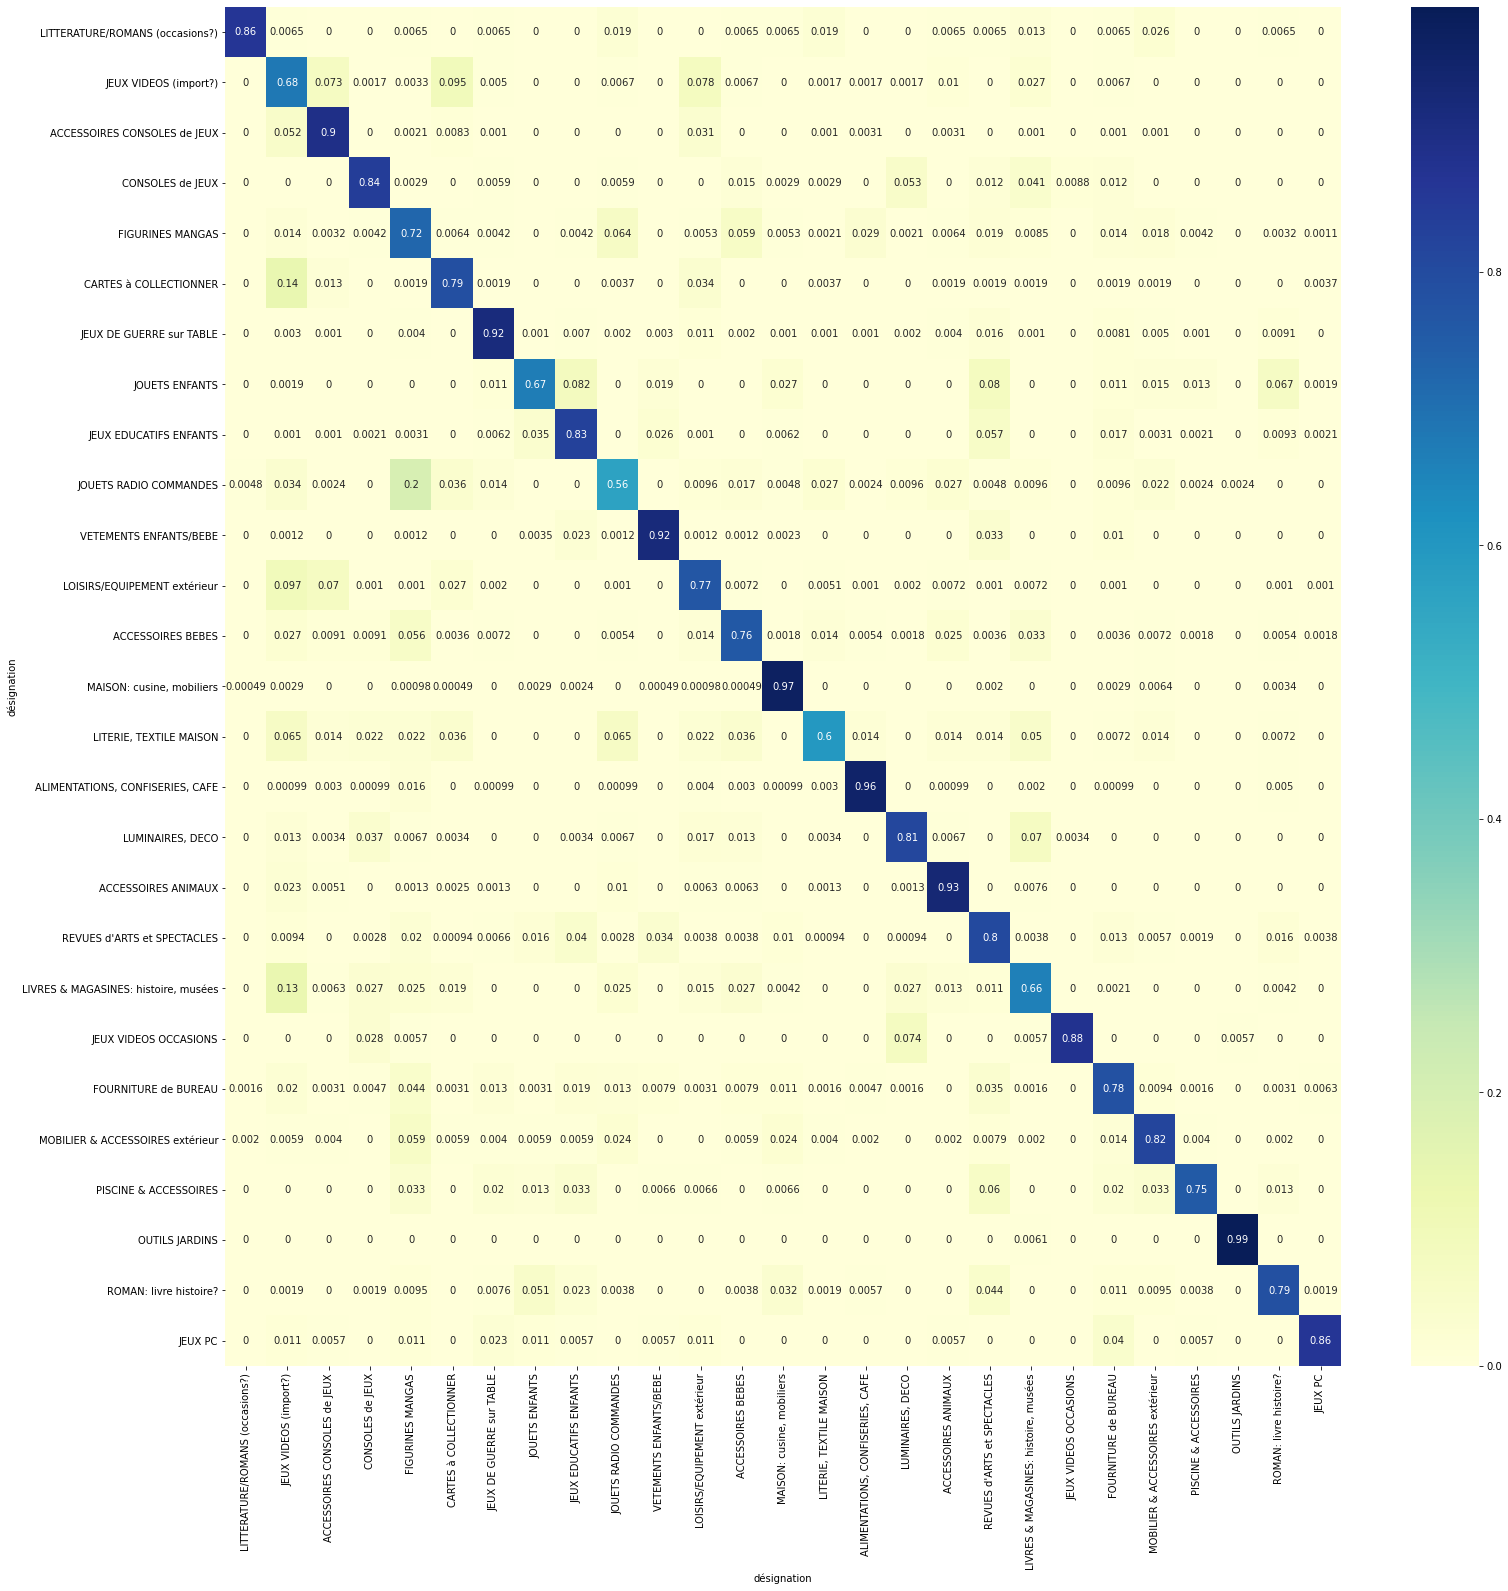

In [ ]:
import seaborn as sns
# Matrice de confusion
plt.figure(figsize=(25,25))
g = sns.heatmap(dfcross,  annot=True, cmap="YlGnBu");
plt.xticks(rotation=90);

In [ ]:
#chargement de ytest et des features pour récuérer l'échantillon d articles tests utilisé pour les modèles
url = "https://raw.githubusercontent.com/JulienJ-44/rakuteam/main/y_pred_proba/y_test.csv"# Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content
y_test_analyse = pd.read_csv(io.StringIO(download.decode('utf-8')), index_col=0)

url = "https://raw.githubusercontent.com/JulienJ-44/rakuteam/main/Features/data_features_final.csv"# Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content
data_features = pd.read_csv(io.StringIO(download.decode('utf-8')))
#on garde que les données avec label (on exclut la partie X_test challenge)
data_features = data_features.dropna(subset=['prdtypecode_x'])

# Drop le Unnamed
try:
    data_features = data_features.drop('Unnamed: 0', axis =1)
except:
  print("(1)no columns Unnamed: 0")
try:
    data_features = data_features.drop('prdtypecode_y', axis =1)
except:
  print("(1)no columns prdtypecode_y")

# on regénère les mêmes échantillons que pour les modèles
X_train, X_test, y_train, y_test = train_test_split(data_features, data_features['prdtypecode_x'], test_size = 0.2, random_state = 123)
y_test_analyse['prédiction'] = y_pred
X_test=X_test.sort_index(axis=0)
#y_test_analyse=y_test_analyse.sort_index(axis=0)
#y_pred=y_pred.sort(axis=0)
y_test_analyse = y_test_analyse.replace({'prdtypecode': {10: 1, 2280:2,   50:3, 1280:4, 2705:5, 2522:6, 2582:7, 1560:8, 1281:9, 1920:10, 2403:11,
       1140:12, 2583:13, 1180:14, 1300:15, 2462:16, 1160:17, 2060:18,   40:19,   60:20, 1320:21, 1302:22,
       2220:23, 2905:24, 2585:25, 1940:26, 1301:0}})


In [ ]:
y_test_analyse.head()

,prdtypecode,prédiction
77312,7,7
74413,1,1
33548,21,21
59073,13,13
25604,13,13


In [ ]:
Global_df_analysis = pd.concat([X_test.drop("prdtypecode_x", axis=1),y_test_analyse], axis = 1)
ligne_erreur = Global_df_analysis[Global_df_analysis['prdtypecode']!=Global_df_analysis['prédiction']]
ligne_erreur.info()
#Quasiment 50% des erreurs de classfication correspondent à des articles à description vide! => amléiorer features RF sur designations

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2829 entries, 51 to 84829
Data columns (total 69 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   designation                    2829 non-null   object 
 1   description                    1500 non-null   object 
 2   productid                      2829 non-null   int64  
 3   desi_nb_phrases                2829 non-null   int64  
 4   desc_nb_phrases                2829 non-null   int64  
 5   best_idf                       2829 non-null   object 
 6   class_10.0                     2829 non-null   float64
 7   class_40.0                     2829 non-null   float64
 8   class_50.0                     2829 non-null   float64
 9   class_60.0                     2829 non-null   float64
 10  class_1140.0                   2829 non-null   float64
 11  class_1160.0                   2829 non-null   float64
 12  class_1180.0                   2829 non-null  

In [ ]:
#dfcross_notnorm = pd.crosstab(y_test.ravel(), y_pred.ravel(), rownames=['Classe réelle'], colnames=['Classe prédite']) #TODO remettre ,normalize = 0
dfcross_notnorm = pd.crosstab(y_test_analyse.prdtypecode, y_test_analyse.prédiction, rownames=['Classe réelle'], colnames=['Classe prédite']) #TODO remettre ,normalize = 0
dfcross_notnorm = dfcross_notnorm.sort_index(axis=0)
dfcross_notnorm = dfcross_notnorm.sort_index(axis=1)
dfcross_notnorm.columns = df_code_designation['désignation']
dfcross_notnorm.index = df_code_designation['désignation']
dfcross_notnorm


désignation,LITTERATURE/ROMANS (occasions?),JEUX VIDEOS (import?),ACCESSOIRES CONSOLES de JEUX,CONSOLES de JEUX,FIGURINES MANGAS,CARTES à COLLECTIONNER,JEUX DE GUERRE sur TABLE,JOUETS ENFANTS,JEUX EDUCATIFS ENFANTS,JOUETS RADIO COMMANDES,VETEMENTS ENFANTS/BEBE,LOISIRS/EQUIPEMENT extérieur,ACCESSOIRES BEBES,"MAISON: cusine, mobiliers","LITERIE, TEXTILE MAISON","ALIMENTATIONS, CONFISERIES, CAFE","LUMINAIRES, DECO",ACCESSOIRES ANIMAUX,REVUES d'ARTS et SPECTACLES,"LIVRES & MAGASINES: histoire, musées",JEUX VIDEOS OCCASIONS,FOURNITURE de BUREAU,MOBILIER & ACCESSOIRES extérieur,PISCINE & ACCESSOIRES,OUTILS JARDINS,ROMAN: livre histoire?,JEUX PC
désignation,,,,,,,,,,,,,,,,,,,,,,,,,,,
LITTERATURE/ROMANS (occasions?),133,1,0,0,1,0,1,0,0,3,0,0,1,1,3,0,0,1,1,2,0,1,4,0,0,1,0
JEUX VIDEOS (import?),0,410,44,1,2,57,3,0,0,4,0,47,4,0,1,1,1,6,0,16,0,4,0,0,0,0,0
ACCESSOIRES CONSOLES de JEUX,0,50,863,0,2,8,1,0,0,0,0,30,0,0,1,3,0,3,0,1,0,1,1,0,0,0,0
CONSOLES de JEUX,0,0,0,286,1,0,2,0,0,2,0,0,5,1,1,0,18,0,4,14,3,4,0,0,0,0,0
FIGURINES MANGAS,0,13,3,4,683,6,4,0,4,60,0,5,56,5,2,27,2,6,18,8,0,13,17,4,0,3,1
CARTES à COLLECTIONNER,0,74,7,0,1,424,1,0,0,2,0,18,0,0,2,0,0,1,1,1,0,1,1,0,0,0,2
JEUX DE GUERRE sur TABLE,0,3,1,0,4,0,910,1,7,2,3,11,2,1,1,1,2,4,16,1,0,8,5,1,0,9,0
JOUETS ENFANTS,0,1,0,0,0,0,6,351,43,0,10,0,0,14,0,0,0,0,42,0,0,6,8,7,0,35,1
JEUX EDUCATIFS ENFANTS,0,1,1,2,3,0,6,34,801,0,25,1,0,6,0,0,0,0,55,0,0,16,3,2,0,9,2


In [ ]:
cm = dfcross_notnorm
df = pd.DataFrame()

i=0
j=0
ClassVrai = []
ClassPredite = []
Erreurs = []
for i in range(len(cm)):
    for j in range(len(cm.columns)):
        if i != j:
            #if cm.iloc[i,j] > 0.05:
                ClassVrai.append(cm.index[i])
                ClassPredite.append(cm.columns[j])
                Erreurs.append(cm.iloc[i,j])
        
df = pd.DataFrame({'Classe réelle' : ClassVrai,
                    'Classe prédite' : ClassPredite,
                    '#Erreurs' : Erreurs
                    })         

In [ ]:
df=df.sort_values(by='#Erreurs',ascending=False)
df.head(10)
#df_sorted[df_sorted['Classe réelle']=='FIGURINES MANGAS']

,Classe réelle,Classe prédite,#Erreurs
287,LOISIRS/EQUIPEMENT extérieur,JEUX VIDEOS (import?),95
238,JOUETS RADIO COMMANDES,FIGURINES MANGAS,82
131,CARTES à COLLECTIONNER,JEUX VIDEOS (import?),74
288,LOISIRS/EQUIPEMENT extérieur,ACCESSOIRES CONSOLES de JEUX,69
495,"LIVRES & MAGASINES: histoire, musées",JEUX VIDEOS (import?),63
112,FIGURINES MANGAS,JOUETS RADIO COMMANDES,60
30,JEUX VIDEOS (import?),CARTES à COLLECTIONNER,57
115,FIGURINES MANGAS,ACCESSOIRES BEBES,56
225,JEUX EDUCATIFS ENFANTS,REVUES d'ARTS et SPECTACLES,55
53,ACCESSOIRES CONSOLES de JEUX,JEUX VIDEOS (import?),50


In [ ]:
#df_code_designation
print("\nErreur %:", df.iloc[indexrow,2])
display_prediction_errors(df.iloc[indexrow,0], df.iloc[indexrow,1])
print("\nExemples d'articles avec cette erreur de classification:")
ligne_erreur_1 = ligne_erreur[((ligne_erreur.prdtypecode==int(classe_reelle_code026)) & (ligne_erreur.prédiction==int(classe_predite_code026)))]
ligne_erreur_1.head(10)  

In [ ]:
df.groupby('Classe réelle').sum().sort_values(by='#Erreurs',ascending=False)

,#Erreurs
Classe réelle,
FIGURINES MANGAS,261
LOISIRS/EQUIPEMENT extérieur,228
REVUES d'ARTS et SPECTACLES,208
JEUX VIDEOS (import?),191
JOUETS RADIO COMMANDES,181
JOUETS ENFANTS,173
JEUX EDUCATIFS ENFANTS,166
"LIVRES & MAGASINES: histoire, musées",161
FOURNITURE de BUREAU,139


In [ ]:
df.groupby('Classe prédite').sum().sort_values(by='#Erreurs',ascending=False)

,#Erreurs
Classe prédite,
JEUX VIDEOS (import?),398
FIGURINES MANGAS,257
REVUES d'ARTS et SPECTACLES,240
LOISIRS/EQUIPEMENT extérieur,160
JEUX EDUCATIFS ENFANTS,155
ACCESSOIRES CONSOLES de JEUX,149
CARTES à COLLECTIONNER,138
JOUETS RADIO COMMANDES,135
ACCESSOIRES BEBES,128


In [ ]:
dfcross_norm = pd.crosstab(y_test_analyse.prdtypecode, y_test_analyse.prédiction, rownames=['Classe réelle'], colnames=['Classe prédite'],normalize = 0) #TODO remettre ,normalize = 0
dfcross_norm = dfcross_norm.sort_index(axis=0)
dfcross_norm = dfcross_norm.sort_index(axis=1)
dfcross_norm.columns = df_code_designation['désignation']
dfcross_norm.index = df_code_designation['désignation']
dfcross_norm

cm = dfcross_norm
df = pd.DataFrame()

i=0
j=0
ClassVrai = []
ClassPredite = []
Erreurs = []
for i in range(len(cm)):
    for j in range(len(cm.columns)):
        if i != j:
            #if cm.iloc[i,j] > 0.05:
                ClassVrai.append(cm.index[i])
                ClassPredite.append(cm.columns[j])
                Erreurs.append(cm.iloc[i,j]*100)
        
df = pd.DataFrame({'Classe réelle' : ClassVrai,
                    'Classe prédite' : ClassPredite,
                    '#Erreurs %' : Erreurs
                    })         
df=df.sort_values(by='#Erreurs %',ascending=False)
df.head(10)
#df_sorted[df_sorted['Classe réelle']=='FIGURINES MANGAS']

,Classe réelle,Classe prédite,#Erreurs %
238,JOUETS RADIO COMMANDES,FIGURINES MANGAS,19.759036
131,CARTES à COLLECTIONNER,JEUX VIDEOS (import?),13.805970
495,"LIVRES & MAGASINES: histoire, musées",JEUX VIDEOS (import?),13.263158
287,LOISIRS/EQUIPEMENT extérieur,JEUX VIDEOS (import?),9.703779
30,JEUX VIDEOS (import?),CARTES à COLLECTIONNER,9.484193
189,JOUETS ENFANTS,JEUX EDUCATIFS ENFANTS,8.206107
199,JOUETS ENFANTS,REVUES d'ARTS et SPECTACLES,8.015267
36,JEUX VIDEOS (import?),LOISIRS/EQUIPEMENT extérieur,7.820300
536,JEUX VIDEOS OCCASIONS,"LUMINAIRES, DECO",7.386364
27,JEUX VIDEOS (import?),ACCESSOIRES CONSOLES de JEUX,7.321131


In [ ]:
indexrow=0 #select which row of dataframe above you want to investigate
classe_reelle_code=df_code_designation[df_code_designation["désignation"]==df.iloc[indexrow,0]]["prdtypecode"]
classe_predite_code=df_code_designation[df_code_designation["désignation"]==df.iloc[indexrow,1]]["prdtypecode"]



Classe: 2    1300
Name: prdtypecode, dtype: int64   JOUETS RADIO COMMANDES
{'générique': 0.603, 'rc': 0.338, 'drone': 0.312, 'dji': 0.241, 'quadcopter': 0.157, 'mavic': 0.143, 'avion': 0.128, 'fpv': 0.127, 'caméra': 0.119, 'maquette': 0.118, 'voiture': 0.112, 'wifi': 0.108, 'car': 0.089, 'pro': 0.089, 'batterie': 0.085}
Classe: 13    1140
Name: prdtypecode, dtype: int64   FIGURINES MANGAS
{'figurine': 0.641, 'pop': 0.329, 'star': 0.202, 'wars': 0.194, 'funko': 0.182, 'shirt': 0.155, 'cm': 0.154, 'figure': 0.128, 'pvc': 0.125, 'marvel': 0.115, 'figurines': 0.097, 'gundam': 0.092, 'dragon': 0.09, 'mug': 0.087, 'japan': 0.084}

Erreur %: 19.759036144578314
          1300       1140
0    générique   figurine
1           rc        pop
2        drone       star
3          dji       wars
4   quadcopter      funko
5        mavic      shirt
6        avion         cm
7          fpv     figure
8       caméra        pvc
9     maquette     marvel
10     voiture  figurines
11        wifi     gundam


,designation,description,productid,desi_nb_phrases,desc_nb_phrases,best_idf,class_10.0,class_40.0,class_50.0,class_60.0,class_1140.0,class_1160.0,class_1180.0,class_1280.0,class_1281.0,class_1300.0,class_1301.0,class_1302.0,class_1320.0,class_1560.0,class_1920.0,class_1940.0,class_2060.0,class_2220.0,class_2280.0,class_2403.0,class_2462.0,class_2522.0,class_2582.0,class_2583.0,class_2585.0,class_2705.0,class_2905.0,desi_nb2chiffres+,desc_nb2chiffres+,desi_num,desi_poids,desc_poids,desi_long,desc_long,desi_vol,desc_vol,desi_ans_mois,desc_ans_mois,desi_pieces,desc_pieces,desi_word_count,desi_char_count (w/o space),desi_total_length,desi_num_exclamation_marks,desi_num_question_marks,desi_num_unique_words,desi_words_vs_unique,desi_word_unique_percent,descri_word_count,descri_char_count (w/o space),descri_total_length,descri_num_exclamation_marks,descri_num_question_marks,descri_num_unique_words,descri_words_vs_unique,descri_word_unique_percent,blanc,noir,R,G,B,prdtypecode,prédiction
791,figurine plomb 54 mm fusilliers anglais 1809 m...,NaN,2590169268,1,0,class_1140.0,0.000,0.099,0.0,0.0,0.641,0.0,0.171,0.0,0.0,0.0,0.000,0.0,0.00,0.0,0.0,0.000,0.0,0.000,0.096,0.0,0.0,0.193,0.0,0.0,0.147,0.000,0.00,1,0,0,0,0,1,0,0,0,0,0,0,0,8,50,57,0,0,8,1.0,100.0,0,0,0,0,0,0,NaN,NaN,0.411196,0.002359,199.549120,184.884148,171.729536,15,12
23595,1/20 maschinen krieger series antigravity armo...,1/20 maschinen krieger series antigravity armo...,3894179351,1,1,class_1301.0,0.000,0.000,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.167,0.0,0.12,0.0,0.0,0.148,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.00,1,1,0,0,0,0,0,0,0,0,0,0,0,13,91,103,0,0,13,1.0,100.0,13,82,94,0,0,13,1.0,100.0,0.717489,0.000315,214.950560,218.982908,222.535804,15,12
35586,petits soldats ww2 ww ii commando us rambo vie...,NaN,285370797,1,0,class_2220.0,0.117,0.000,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.00,0.0,0.0,0.000,0.0,0.373,0.000,0.0,0.0,0.193,0.0,0.0,0.147,0.301,0.02,1,0,0,0,0,0,0,0,0,0,0,0,0,11,51,61,0,0,11,1.0,100.0,0,0,0,0,0,0,NaN,NaN,0.231552,0.000008,197.974224,191.191720,176.180128,15,12


Data type before reconstruction :  <class 'bytes'>
Data type after reconstruction :  <class 'dict'>
{2583.0: {'piscine': 0.58, 'kit': 0.288, 'bâche': 0.243, 'spa': 0.194, 'pompe': 0.161, 'bulles': 0.154, 'intex': 0.148, 'cm': 0.137, 'ronde': 0.123, 'acier': 0.12, 'gonflable': 0.12, 'filtration': 0.111, 'gré': 0.111, 'filtre': 0.106, 'bois': 0.106}, 1560.0: {'cm': 0.271, 'matelas': 0.224, 'cuisine': 0.222, 'table': 0.172, 'chaise': 0.164, 'blanc': 0.157, 'bois': 0.15, 'tissu': 0.146, 'rangement': 0.141, 'salle': 0.128, 'fournitures': 0.123, 'design': 0.115, 'sommier': 0.115, 'gris': 0.114, 'pieds': 0.113}, 1300.0: {'générique': 0.603, 'rc': 0.338, 'drone': 0.312, 'dji': 0.241, 'quadcopter': 0.157, 'mavic': 0.143, 'avion': 0.128, 'fpv': 0.127, 'caméra': 0.119, 'maquette': 0.118, 'voiture': 0.112, 'wifi': 0.108, 'car': 0.089, 'pro': 0.089, 'batterie': 0.085}, 2060.0: {'led': 0.293, 'noël': 0.26, 'décoration': 0.229, 'lampe': 0.228, 'décor': 0.204, 'bricolage': 0.171, 'peinture': 0.161, 'l

In [ ]:
df.groupby('Classe prédite').sum().sort_values(by='#Erreurs %',ascending=False)

,#Erreurs %
Classe prédite,
JEUX VIDEOS (import?),68.350324
FIGURINES MANGAS,55.661855
REVUES d'ARTS et SPECTACLES,40.548885
LOISIRS/EQUIPEMENT extérieur,30.011088
"LIVRES & MAGASINES: histoire, musées",28.911785
JOUETS RADIO COMMANDES,26.815993
JEUX EDUCATIFS ENFANTS,25.055645
CARTES à COLLECTIONNER,23.422163
ACCESSOIRES BEBES,22.698794


In [ ]:
df.groupby('Classe réelle').sum().sort_values(by='#Erreurs %',ascending=False)

,#Erreurs %
Classe réelle,
JOUETS RADIO COMMANDES,45.060241
"LITERIE, TEXTILE MAISON",38.129496
"LIVRES & MAGASINES: histoire, musées",35.578947
JOUETS ENFANTS,32.824427
JEUX VIDEOS (import?),31.447587
FIGURINES MANGAS,27.012712
PISCINE & ACCESSOIRES,26.490066
CARTES à COLLECTIONNER,24.813433
ACCESSOIRES BEBES,23.731884
